<a href="https://colab.research.google.com/github/Supr3me-code/Pose_Detect/blob/master/Pose_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

Uninstalling torch-1.6.0+cu101:
  Successfully uninstalled torch-1.6.0+cu101
Uninstalling torchvision-0.7.0+cu101:
  Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 48.8MB/s 


In [ ]:
import torch 
import fastai
from fastai.vision import *
from fastai.metrics import error_rate

print(torch.__version__)
print(fastai.__version__)

1.4.0
1.0.61


In [ ]:
path = Path('/content/drive/My Drive/Pose')

In [ ]:
path.ls()

[PosixPath('/content/drive/My Drive/Pose/centre'),
 PosixPath('/content/drive/My Drive/Pose/left'),
 PosixPath('/content/drive/My Drive/Pose/right'),
 PosixPath('/content/drive/My Drive/Pose/models'),
 PosixPath('/content/drive/My Drive/Pose/pose_stage_1.pkl'),
 PosixPath('/content/drive/My Drive/Pose/.ipynb_checkpoints')]

In [ ]:
classes = ['left','centre','right']

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=224, padding_mode='zeros', num_workers=4, bs=32).normalize(imagenet_stats)

In [ ]:
!cd drive/My Drive

/bin/bash: line 0: cd: too many arguments


In [ ]:
!ln -s "/content/drive/My Drive" /myDrive

In [ ]:
!cd /myDrive

In [ ]:
!sudo apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-goth

In [ ]:
!cd /myDrive/Pose/centre; mogrify -format jpg *.jfif

In [ ]:
!cd /myDrive/Pose/right; mogrify -format jpg *.jfif

In [ ]:
!cd /myDrive/Pose/left; mogrify -format jpg *.jfif

In [ ]:
data.classes

['centre', 'left', 'right']

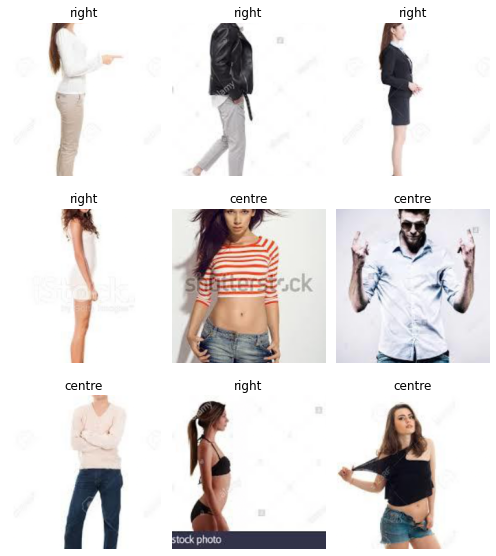

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

AttributeError: ignored

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.081579,0.640748,0.179487,0.820513,06:22
1,0.669931,0.536277,0.166667,0.833333,00:11
2,0.512717,0.353586,0.115385,0.884615,00:10
3,0.353278,0.395198,0.102564,0.897436,00:10
4,0.214703,0.292772,0.089744,0.910256,00:10
5,0.138216,0.264501,0.070513,0.929487,00:10
6,0.090436,0.302410,0.089744,0.910256,00:10
7,0.071480,0.301550,0.086538,0.913462,00:10
8,0.047689,0.283086,0.076923,0.923077,00:10
9,0.038233,0.278648,0.083333,0.916667,00:10


In [ ]:
learn.save('pose_stage_1')

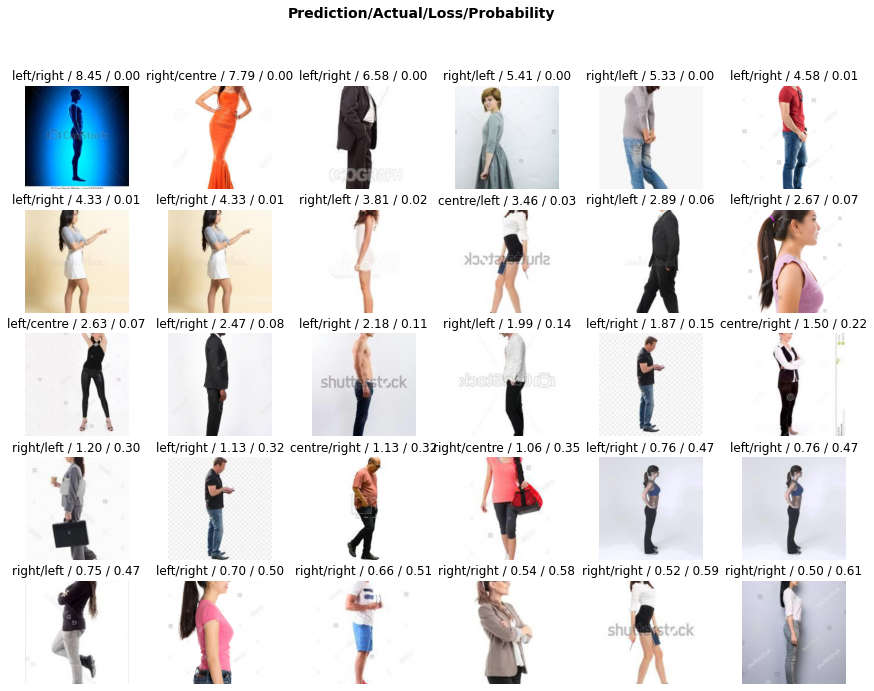

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(30, figsize=(15,11))

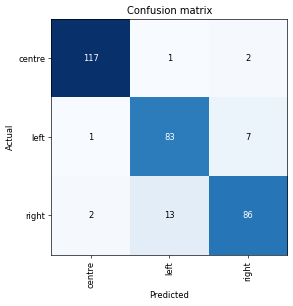

In [ ]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [ ]:
interp.most_confused(min_val=1)

[('right', 'left', 13),
 ('left', 'right', 7),
 ('centre', 'right', 2),
 ('right', 'centre', 2),
 ('centre', 'left', 1),
 ('left', 'centre', 1)]

In [ ]:
learn.load('pose_stage_1')

Learner(data=ImageDataBunch;

Train: LabelList (1251 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
centre,centre,centre,centre,centre
Path: /content/drive/My Drive/Pose;

Valid: LabelList (312 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
centre,centre,right,right,centre
Path: /content/drive/My Drive/Pose;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0

In [ ]:
learn.lr_find(stop_div=False, num_it=200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


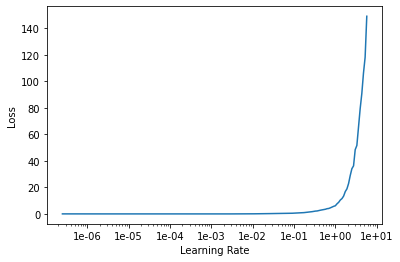

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.329204,2.047880,0.262821,0.737179,00:11
1,0.287968,0.407873,0.080128,0.919872,00:11
2,0.162185,0.264551,0.035256,0.964744,00:11


In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow==1.13.1 

Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 92.5MB 2.0MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 368kB 61.0MB/s 
     |████████████████████████████████| 3.2MB 54.2MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0


In [ ]:
pip install mrcnn

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-cp36-none-any.whl size=54931 sha256=6767d7c6e9791a4d542b898fd19a470e48412933b7ccab6a150fb2ec95faeaef
  Stored in directory: /root/.cache/pip/wheels/11/ed/28/e550ddc897c04c336b923eae4eb35c9aae993d20ce39d9cc40
Successfully built mrcnn


In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 116.77 MiB | 11.48 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [ ]:
!pip uninstall keras -y
!pip install keras==2.3.0

     |████████████████████████████████| 378kB 2.8MB/s 


In [ ]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/drive/My Drive")

import warnings
warnings.filterwarnings("ignore")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
# import coco
from Mask_RCNN.samples.coco import coco
%matplotlib inline

Using TensorFlow backend.


In [ ]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
# IMAGE_DIR = os.path.join(ROOT_DIR, "images")

... done downloading pretrained model!


In [ ]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# Load weights trained on MS-COCO
model.load_weights('mask_rcnn_coco.h5', by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [ ]:
# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

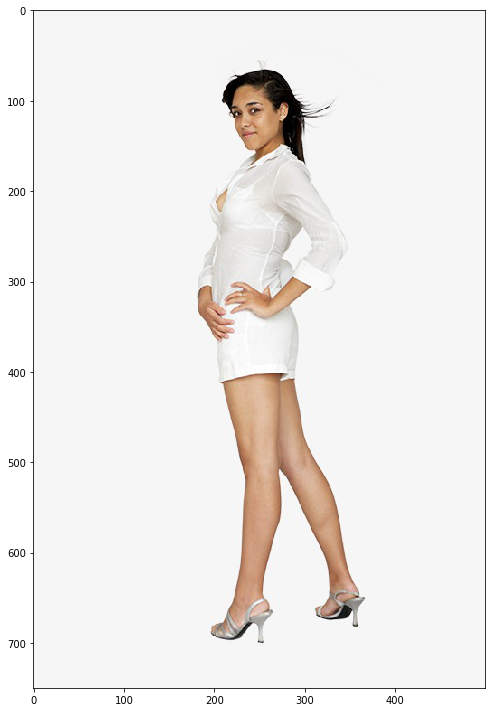

In [ ]:
# Load a random image from the images folder
image = skimage.io.imread('/content/drive/My Drive/left2.jpg')

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (750, 500, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


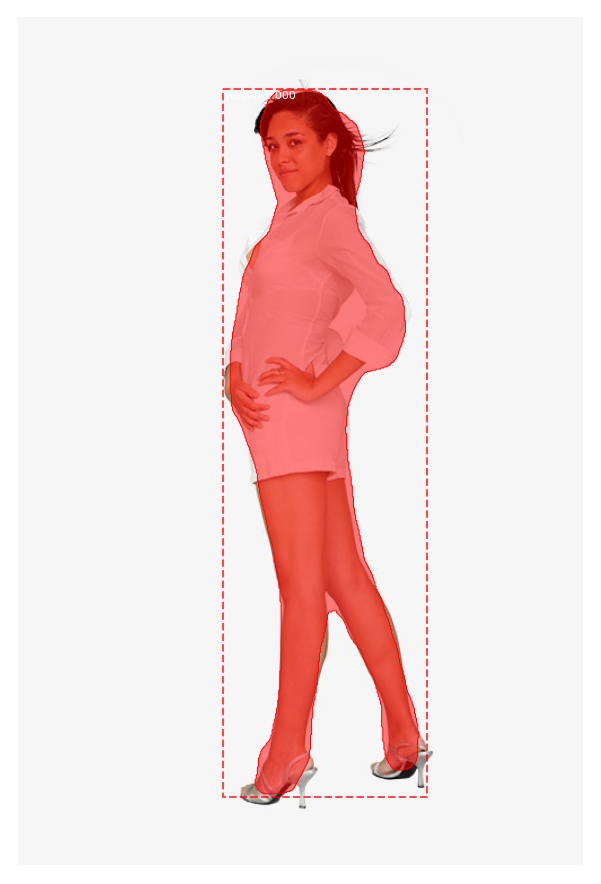

In [ ]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [ ]:
mask = r['masks']
mask = mask.astype(int)
mask.shape

(750, 500, 1)

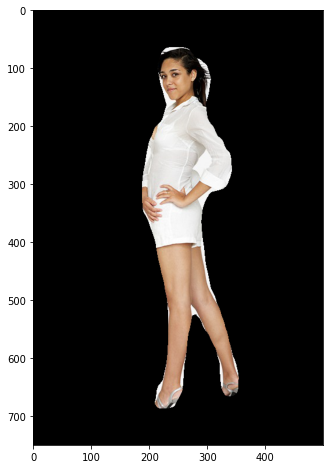

In [ ]:
for i in range(mask.shape[2]):
    temp = skimage.io.imread('/content/drive/My Drive/left2.jpg')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    plt.figure(figsize=(8,8))
    plt.imshow(temp)

In [ ]:
learn.export("pose_stage_1.pkl")

In [ ]:
learn = load_learner(path,"pose_stage_1.pkl")
learn.data.classes

['centre', 'left', 'right']

In [ ]:
from PIL import Image
import numpy as np
img = Image.fromarray(temp, 'RGB')
img.save('my.png')
img.show()

In [ ]:
# path1=Path('/content')

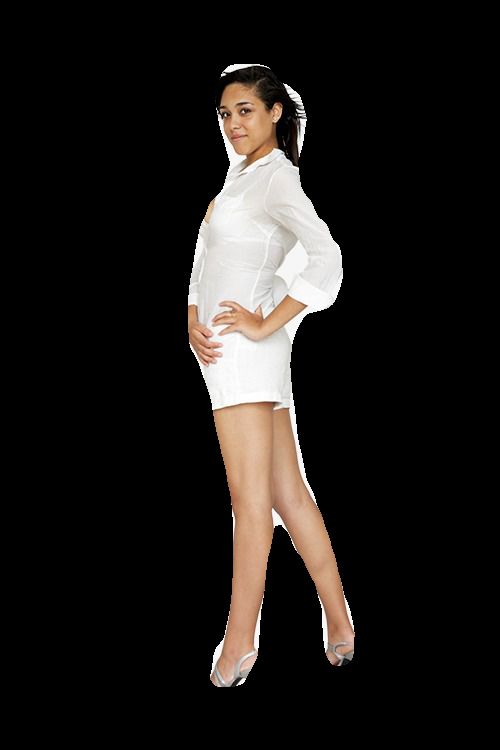

In [ ]:
img = open_image('/content/my.png')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)
print(pred_idx)
print(outputs)

left
tensor(1)
tensor([1.0393e-04, 9.9602e-01, 3.8768e-03])
